## Customers

In [18]:
import numpy as np
a2 = np.loadtxt('baseline.txt', dtype=int)
a2

# for id_pict in a2:
#     print(id_pict)
a2[0]

685814003

In [5]:
import pickle
with open('data_test.json', 'rb') as fp:
   data = pickle.load(fp)

# data
# print(data)
# print(type(data))

# ça nous renvoi un tableau avec avec les id images de ses articles préférés
customerX = data['celine']
customerX

# for pict in customerX:
#     print(pict)

array([220094019, 220365001, 220365004, 224314018, 224606031, 225784023,
       225784037, 226959009, 233091003, 235732024, 237347017, 224314007])

In [12]:
data

{'000270f6018e827d6d678efe815565a22668fb801b2b89bf84b1cb4f4ca631ea': array([685814003, 621381012, 715624001, 685813043, 685814001, 682550002,
        621381014, 685814063, 706016002, 806388001, 706016001, 767423001]),
 '0005653de6979862791b1de079f271419bc73adcfece2cffe2596cb8a64e2ece': array([685814003, 621381012, 715624001, 685813043, 685814001, 682550002,
        621381014, 685814063, 706016002, 806388001, 706016001, 767423001]),
 '0006ca2c5ecdbdcc1de5e72adffc6c33448fc2aaa62afed8be1cfd13e698a438': array([685814003, 621381012, 715624001, 685813043, 685814001, 682550002,
        621381014, 685814063, 706016002, 806388001, 706016001, 767423001]),
 '00089f13f465ec902e5c49a3bb408c5e31205096d6f267543f1893303e456016': array([685814003, 621381012, 715624001, 685813043, 685814001, 682550002,
        621381014, 685814063, 706016002, 806388001, 706016001, 767423001]),
 '000d1eefd2d2f8387c6c4f2d61bf16be84dd7293567d89de70b8688c6e5335c8': array([685814003, 621381012, 715624001, 685813043, 68581400

In [2]:
import pandas as pd
df = pd.read_csv('../raw_data/customers.csv')
df.head()
#FN = Fashion News

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


## comptage

In [12]:
df.count()

customer_id               1371980
FN                         476930
Active                     464404
club_member_status        1365918
fashion_news_frequency    1355971
age                       1356119
postal_code               1371980
dtype: int64

In [ ]:
# customers              : 1 371 980
# FN                     :   476 930  (Fashion News)
# Active                 :   464 404  (customer is active for communication)
# club_member_status     : 1 365 918
# fashion_news_frequency : 1 355 971
# age                    : 1 356 119
# postal_code            : 1 371 980

In [24]:
# différente valeurs de chaque colonne
df['club_member_status'].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

### club_member_status

In [29]:
# Nombre de chaque valeur dans chaque colonne:
club_member_status = df.groupby('club_member_status')['customer_id'].nunique()
club_member_status
# none = 6062

club_member_status
ACTIVE        1272491
LEFT CLUB         467
PRE-CREATE      92960
Name: customer_id, dtype: int64

### Active

In [53]:
Active = df.groupby('Active')['customer_id'].nunique()
Active

Active
1.0    464404
Name: customer_id, dtype: int64

### FN

In [54]:
FN = df.groupby('FN')['customer_id'].nunique()
FN

FN
1.0    476930
Name: customer_id, dtype: int64

### age

In [102]:
age = df.groupby('age')['customer_id'].nunique()
age.sort_values()

age
96.0        3
94.0        3
97.0        4
93.0        4
98.0        7
        ...  
23.0    54867
25.0    54989
20.0    55196
24.0    56124
21.0    67530
Name: customer_id, Length: 84, dtype: int64

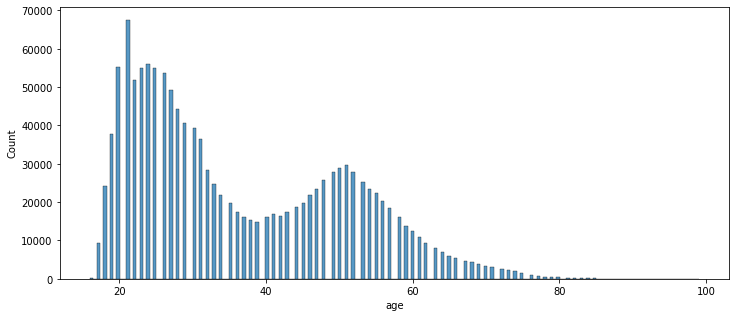

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
sns.histplot(df['age'])
plt.show()

### Tri sur FN nul

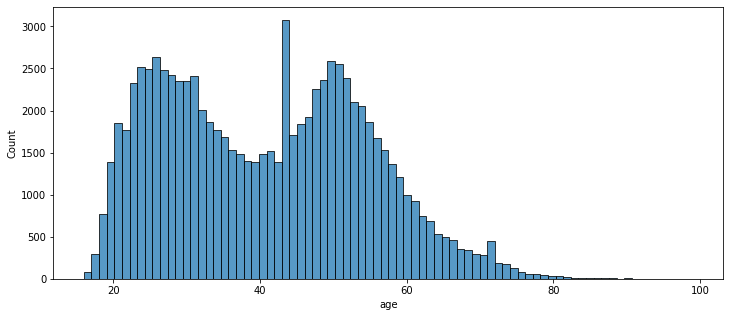

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
25,000114c6996ef5703a8d455faf2103f8488d3928348e07...,1.0,1.0,PRE-CREATE,Regularly,40.0,364bc321c321e34c5a94d539f8614609aa3d59fc5bbceb...
34,00019d6c20e0fbb551af18c57149af4707ec016bb0decd...,NaN,NaN,PRE-CREATE,NONE,55.0,1fd5eb222d4cc8407054f34fdfc7a353b9b71a7735c4d5...
48,0002697f519fce0a41f12929696aad2cda5b3a05248961...,NaN,NaN,PRE-CREATE,NONE,33.0,475170c26e9e4a76c97dc0f3dea0e8c456a8835726c495...
49,00026b2e6fa592951b3f1f5b24fea406a356d23e84fc80...,NaN,NaN,PRE-CREATE,NONE,60.0,db68cb2c2df9bf5161f3220f4d784e1a56e6da3f67e901...
95,00041bd4c669adc077b6488a2d23ee229a9ad962ab3ee7...,NaN,NaN,PRE-CREATE,NONE,58.0,ea731df2fc7625e27cb20ea1a17bb3255ddb125ef35459...
...,...,...,...,...,...,...,...
1371933,fffd5330e36a95750bd023e6f146ebbc4d2838a6e75cb2...,NaN,NaN,PRE-CREATE,NONE,23.0,0f416f49d3fe0e8da43dc61418fadab9406734832617bb...
1371944,fffdfad0d0527fa55b97f0d2f2ae4b2e659de8345bfd73...,NaN,NaN,PRE-CREATE,NONE,22.0,33abca44736680635058d1041795f5eeb1a88237059465...
1371954,fffebb3ec427e5f7a4220d95878d42d4227cb3bc4cfa7e...,NaN,NaN,PRE-CREATE,NONE,53.0,a9622ca8d61a565ccf41ee677a1eabd2cb65c937d38e21...
1371957,fffec7f7e9bc9270d49b39c870feba01d9367c53b31f54...,NaN,NaN,PRE-CREATE,NONE,47.0,bdcce24e89a9f810e2b10efa54e36013c3795e168ddd18...


In [97]:
mask_none = df['club_member_status'] == 'PRE-CREATE'
df_freq_fashion = df[mask_none]


plt.figure(figsize=(12, 5))
sns.histplot(df_freq_fashion['age'])
plt.show()

# plt.figure(figsize=(12, 5))
# sns.histplot(df['club_member_status'])
# plt.show()

df_freq_fashion

In [116]:
# mask_age = df['age'] < 20
# df_age = df[mask_age]

# df_age
# df_age.nunique()

# FN = df_freq.groupby('fashion_news_frequency')['customer_id'].nunique()
# FN
values=[90,99]
age_16_20 = df[df.age.isin(values)]
age_16_20

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
1734,0050e3f9ad1b528912aeedbb9566f601f88d4a3177d919...,NaN,NaN,ACTIVE,NONE,90.0,56e7dfe914d6bed3c52af92acc27e57e4681710d50a6e8...
7253,015a9d2d9dfcdfa65ddfd1402fffb481fd0a25a557490c...,NaN,NaN,ACTIVE,NONE,90.0,fb0b895455d6849f2d75d6b10d60755e06bb440fb5e665...
30971,05d0d14d9e7f4b332a979a29dc5dbe96af2a9e5fe12a04...,NaN,NaN,ACTIVE,NONE,90.0,b5f937c1e174799e69e2f34107813ae96fbe19f98eb853...
40233,0787cc5ba887f87e5ad2d723a9b044ec841464b33b0ea8...,NaN,NaN,PRE-CREATE,NONE,90.0,b0f4d24b1de5b2696525cb69e5610fc5a3b4cb476a7bc9...
61570,0b8208af6f68f599c62f1659d4cb07324e020c1e0de248...,1.0,1.0,PRE-CREATE,Regularly,90.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
79750,0ee48ce90867f09dfd6b74f8d250331d6388ee924b4ae1...,NaN,NaN,ACTIVE,NONE,90.0,a45117696b7b213bd83718801a3d9c858adb6e8b4c1308...
90829,10f98795ca6807806f51c0464d5659d7db50bcc06e4576...,NaN,NaN,ACTIVE,NONE,90.0,5a339075f5ccca3ef47fecc6bac36532de45b6a9aaee72...
95365,11d0be4225114df5ed1b2e541991cee486c68828488fe5...,NaN,NaN,ACTIVE,NONE,90.0,a340638bfca1b8048998c5d2805ed143f0710557ee1bce...
191659,23b7e974d88a6373ba0e02fd39b1a048dec0ac8a9b4ed0...,NaN,NaN,ACTIVE,NONE,99.0,4cae8633de56064a17826b7da3feb760f2c152a93164d1...
232150,2b5284f19d272d7b7f1006289566076d72a7f097feb03f...,NaN,NaN,ACTIVE,NONE,99.0,8321392df5bfee24de6920492d8c9810f4bd422d0a527e...


### fashion_news_frequency

In [33]:
fashion_news_frequency = df.groupby('fashion_news_frequency')['customer_id'].nunique()
fashion_news_frequency

fashion_news_frequency
Monthly         842
NONE         877711
None              2
Regularly    477416
Name: customer_id, dtype: int64

### Valeur none

In [56]:
df.isnull().sum().sort_values(ascending=False)

Active                    907576
FN                        895050
fashion_news_frequency     16009
age                        15861
club_member_status          6062
customer_id                    0
postal_code                    0
dtype: int64

In [86]:
df.isnull().sum().sort_values(ascending=False)/len(df)

Active                    0.661508
FN                        0.652378
fashion_news_frequency    0.011669
age                       0.011561
club_member_status        0.004418
customer_id               0.000000
postal_code               0.000000
dtype: float64

# Grouping by Age

In [ ]:
# On va segmenter notre dataset en fonction des âges de cette maniére:
#    de 16 à 30 ans: on fait un nouveau groupe tout les 2 ans
#    de 30 à 50 ans, on fait un nouveau groupe tout les 5 ans
#    un dernier groupe des plus de 60 ans


In [3]:
age_id = 0
age_group = pd.DataFrame(columns =["age","age_id"])
age=16

for i in range(53) :
    if age < 30 :
        temp_group = pd.DataFrame({"age":[age, age+1], "age_id":[age_id, age_id]})
        age_group = age_group.append(temp_group)
        age += 2
        age_id += 1
    elif  age < 60 :
        temp_group = pd.DataFrame({"age":[age, age+1, age+2, age+3, age+4],"age_id":[age_id, age_id, age_id, age_id, age_id]})
        age_group = age_group.append(temp_group)
        age += 5
        age_id += 1
    else:
        temp_group = pd.DataFrame({"age":[age], "age_id":[age_id]})
        age_group = age_group.append(temp_group)
        age += 1

In [11]:
age_group.head(50)

,age,age_id
0,16,0
1,17,0
0,18,1
1,19,1
0,20,2
1,21,2
0,22,3
1,23,3
0,24,4
1,25,4


In [5]:
customers_df = pd.merge(df, age_group, on="age", how = "left")
# customers_df = customers_df.drop(["FN", "Active", "club_member_status", "fashion_news_frequency"], axis=1)
customers_df
# faire 13 clusters

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,10
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,4
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,4
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,11
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,11
...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,4
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,2
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,2
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,1


In [12]:
customers_df.isnull().sum().sort_values(ascending=False)

Active                    907576
FN                        895050
fashion_news_frequency     16009
age                        15861
age_id                     15861
club_member_status          6062
customer_id                    0
postal_code                    0
dtype: int64

In [35]:
mask_age = customers_df['age_id'] == 13
customers_age_60 = customers_df[mask_age]

customers_age_60
# df_age_id_0.nunique()
# age_nul = customers_df.age.isnull()
# age_nul

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_id
16,0000b7a134c3ec0d8842fad1fd4ca28517424c14fc4848...,NaN,NaN,ACTIVE,NONE,75.0,e3f4042e6f6c5d8165f7c08fc865eb7e9281396ddca498...,13
31,00018385675844f7a6babbed41b5655b5727fb16483b6e...,1.0,1.0,ACTIVE,Regularly,68.0,b326b39f554f93b7f2a18a286fcbccbc9e2ab306805a98...,13
37,0001bc8e81a72aaf228a103a85d2ac530c09defffbc6ab...,NaN,NaN,ACTIVE,NaN,60.0,34e570387afde3ed8922147c726c74c88c79800d8aeb56...,13
49,00026b2e6fa592951b3f1f5b24fea406a356d23e84fc80...,NaN,NaN,PRE-CREATE,NONE,60.0,db68cb2c2df9bf5161f3220f4d784e1a56e6da3f67e901...,13
84,0003e56a4332b2503e34640be92031ad48f1280ee6e3a7...,1.0,1.0,ACTIVE,Regularly,70.0,87a11433a6d5bfbd22ef961061bb77b2f3236e460afb2a...,13
...,...,...,...,...,...,...,...,...
1371870,fffa72642c8c71f4d4e7b6dd644983d05111965f69e5ac...,NaN,NaN,ACTIVE,NONE,74.0,36e5f2bf2888e6b062c19829f7dea6bdaa61ebe09223bd...,13
1371905,fffbf3d9ceedbdfa3e41b8851b8e3ae21267befac31d00...,1.0,1.0,ACTIVE,Regularly,60.0,aab26bc7613325f61fd073151078510d8ed836f9d8923e...,13
1371929,fffd21f1e18d27df08db7814e8d76be0d59903d6d42fd4...,NaN,NaN,ACTIVE,NONE,70.0,90cde80722a16fd89674b0cbc5b6bc2925eec9975f7458...,13
1371941,fffdd9c81f64c0228a54e1c0240cf40877acec6ce985d4...,NaN,NaN,ACTIVE,NONE,66.0,5528f2b6b393ccfdfe698e06752e4774447a0a9c4b0f72...,13


### Transformation en CSV

In [36]:
# Dataframe customers with column age_id to CSV
# customers_df.to_csv("customers_age.csv", index=False)

customers_age_16_17.to_csv("customers_age_16_17.csv", index=False)
customers_age_18_19.to_csv("customers_age_18_19.csv", index=False)
customers_age_20_21.to_csv("customers_age_20_21.csv", index=False)
customers_age_22_23.to_csv("customers_age_22_23.csv", index=False)
customers_age_24_25.to_csv("customers_age_24_25.csv", index=False)
customers_age_26_27.to_csv("customers_age_26_27.csv", index=False)
customers_age_28_29.to_csv("customers_age_28_29.csv", index=False)
customers_age_30_34.to_csv("customers_age_30_34.csv", index=False)
customers_age_35_39.to_csv("customers_age_35_39.csv", index=False)
customers_age_40_44.to_csv("customers_age_40_44.csv", index=False)
customers_age_45_49.to_csv("customers_age_45_49.csv", index=False)
customers_age_50_54.to_csv("customers_age_50_54.csv", index=False)
customers_age_55_59.to_csv("customers_age_55_59.csv", index=False)
customers_age_60.to_csv("customers_age_60.csv", index=False)

In [6]:
age_frequency = customers_df.groupby('age_id')['customer_id'].nunique()
age_frequency

age_id
0       9553
1      62030
2     122726
3     106736
4     111113
5     102792
6      84991
7     150520
8      83548
9      85493
10    118625
11    135326
12     90916
13     91750
Name: customer_id, dtype: int64

# Code postal

In [143]:
code_postal = df.groupby('postal_code')['customer_id'].nunique().count()
print('nombre de codes postal unique: ', code_postal)

nombre de codes postal unique:  352899


In [144]:
display(customers_df["postal_code"].describe())
print("postal code length = ", len(customers_df.loc[0, "postal_code"]))

count                                               1371980
unique                                               352899
top       2c29ae653a9282cce4151bd87643c907644e09541abc28...
freq                                                 120303
Name: postal_code, dtype: object

postal code length =  64


In [7]:
post_df = customers_df["postal_code"].str.split('', expand=True)
post_df["1_2"] = post_df[1].str.cat(post_df[2])
for i in range(8) :
    post_df[f"1_{i+3}"] = post_df[f"1_{i+2}"].str.cat(post_df[i+3])

In [8]:
a = post_df[1].nunique()
print("1st dig: counts =",  a)
for i in range(9) :
    b = post_df[f"1_{i+2}"].nunique()
    print(f"1 to {i+2} : counts =",  b, "   above row *", b/a)
    a = b

1st dig: counts = 16
1 to 2 : counts = 256    above row * 16.0
1 to 3 : counts = 4096    above row * 16.0
1 to 4 : counts = 65224    above row * 15.923828125
1 to 5 : counts = 299936    above row * 4.598552679995094
1 to 6 : counts = 349228    above row * 1.16434172623493
1 to 7 : counts = 352685    above row * 1.0098989771725062
1 to 8 : counts = 352883    above row * 1.0005614074882685
1 to 9 : counts = 352898    above row * 1.0000425070065715
1 to 10 : counts = 352899    above row * 1.0000028336799869
